#  Building A Handwritten Digits Classifier

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits_data=load_digits()

In [2]:
digits_data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
labels=pd.Series(digits_data['target'])
data=pd.DataFrame(digits_data['data'])

In [4]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
data.shape

(1797, 64)

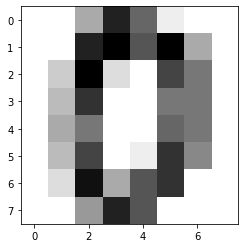

In [6]:
first_image=data.iloc[0]
np_image=first_image.values
np_image=np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

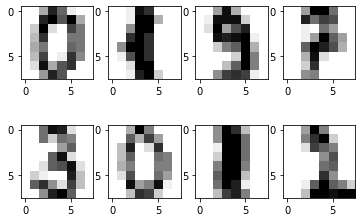

In [7]:
f, axarr=plt.subplots(2,4)
axarr[0,0].imshow(data.iloc[0].values.reshape(8,8),cmap='gray_r')
axarr[0,1].imshow(data.iloc[99].values.reshape(8,8),cmap='gray_r')
axarr[0,2].imshow(data.iloc[199].values.reshape(8,8),cmap='gray_r')
axarr[0,3].imshow(data.iloc[299].values.reshape(8,8),cmap='gray_r')

axarr[1,0].imshow(data.iloc[999].values.reshape(8,8),cmap='gray_r')
axarr[1,1].imshow(data.iloc[1099].values.reshape(8,8),cmap='gray_r')
axarr[1,2].imshow(data.iloc[1199].values.reshape(8,8),cmap='gray_r')
axarr[1,3].imshow(data.iloc[1299].values.reshape(8,8),cmap='gray_r')


## K-Nearest Neighbors Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# split the dataset into train and test sets, 50% train/test validation
def train_knn(nneighbors, train_features, train_labels):
    knn=KNeighborsClassifier(n_neighbors=nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions=model.predict(test_features)
    train_test_df=pd.DataFrame()
    train_test_df['correct_label']=test_labels
    train_test_df['predicted_label']=predictions
    overall_accuracy = sum(train_test_df['predicted_label']==train_test_df['correct_label'])/len(train_test_df)
    return overall_accuracy

def cross_validate(k):
    fold_accuracies=[]
    kf=KFold(n_splits=4,random_state=2,shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features,test_features=data.loc[train_index], data.loc[test_index]
        train_labels, test_labels= labels.loc[train_index], labels.loc[test_index]
        model=train_knn(k,train_features,train_labels)
        overall_accuracy=test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies
    
knn_one_accuracy=cross_validate(1)
np.mean(knn_one_accuracy)

0.9888728037614452

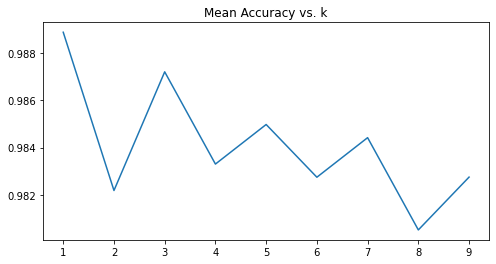

In [21]:
k_values= list(range(1,10))
k_overall_accuracies=[]
for k in k_values:
    k_accuracies=cross_validate(k)
    k_mean_accuracy=np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy vs. k')
plt.plot(k_values, k_overall_accuracies)

In [34]:
k_overall_accuracies

[0.9888728037614452,
 0.9821912892848305,
 0.9872011878247959,
 0.9833073496659243,
 0.9849777282850779,
 0.9827517941103686,
 0.9844221727295223,
 0.9805270972531551,
 0.9827567433803515]

There are a few downsides to using k-nearest neighbors:

1. high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
2. no model representation to debug and explore

## Neural network with one hidden layer

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

# Train/test validation
def train_nn(neuron_arch, train_features, train_lables):
    mlp=MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_lables)
    return mlp

def test(model, test_features, test_labels):
    predictions=model.predict(test_features)
    train_test_df=pd.DataFrame()
    train_test_df['correct_label']=test_labels
    train_test_df['predicted_label']=predictions
    overal_accuracy=sum(train_test_df['predicted_label']==train_test_df['correct_label'])/len(train_test_df)
    return overal_accuracy

def cross_validate(neuron_arch):
    fold_accuracies=[]
    kf=KFold(n_splits=4, random_state=2,shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features=data.loc[train_index], data.loc[test_index]
        train_lables, test_labels=labels.loc[train_index], labels.loc[test_index]
        
        model=train_nn(neuron_arch, train_features, train_lables)
        overal_accuracy=test(model, test_features, test_labels)
        fold_accuracies.append(overal_accuracy)
    return fold_accuracies



C:\Users\bayonetta\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bayonetta\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bayonetta\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bayonetta\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bayonetta\Anaconda\lib\site-packages\sklearn\neural

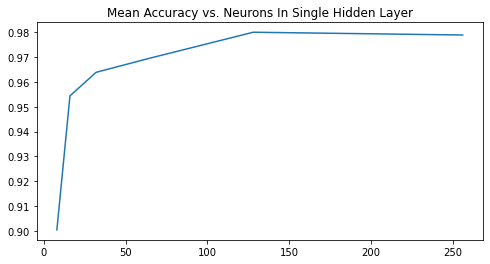

In [29]:
nn_one_neurons=[(8,),
               (16,),
               (32,),
               (64,),
               (128,),
               (256,)]
nn_one_accuracies=[]
for n in nn_one_neurons:
    nn_accuracy=cross_validate(n)
    nn_mean_accuracy=np.mean(nn_accuracy)
    nn_one_accuracies.append(nn_mean_accuracy)
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy vs. Neurons In Single Hidden Layer')

x=[i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)


In [35]:
nn_one_accuracies

[0.9003959415986142,
 0.9543714427121999,
 0.9638356842365751,
 0.9693949517446177,
 0.9799703043801039,
 0.9788579559514972]

Adding more neurons to the single hidden layer improved the accuracy to about 97.9%. But it doesn't tell us anything about false or true positives/negatives.

The K-NN reached about 98.8% accuracy, the single hidden layer neural network doesn't seem to be better than it.

## Neural network with two hidden layers

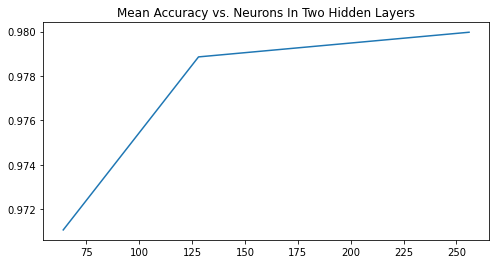

In [37]:
nn_two_neurons=[
    (64,64),
    (128,128),
    (256,256)
]
nn_two_accuracies=[]
for n in nn_two_neurons:
    nn_accuracies=cross_validate(n)
    nn_mean_accuracy=np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy vs. Neurons In Two Hidden Layers')

x=[i[0] for i in nn_two_neurons]
plt.plot(x,nn_two_accuracies)

In [33]:
nn_two_accuracies

[0.9716283098243008, 0.976077703538728, 0.9799715416975996]

## Neural network with three hidden layares and 6-fold cross validation 

In [38]:
def train_nn(neuron_arch, train_features, train_lables):
    mlp=MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_lables)
    return mlp

def test(model, test_features, test_labels):
    predictions=model.predict(test_features)
    train_test_df=pd.DataFrame()
    train_test_df['correct_label']=test_labels
    train_test_df['predicted_label']=predictions
    overal_accuracy=sum(train_test_df['predicted_label']==train_test_df['correct_label'])/len(train_test_df)
    return overal_accuracy

def cross_validate(neuron_arch):
    fold_accuracies=[]
    kf=KFold(n_splits=6, random_state=2,shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features=data.loc[train_index], data.loc[test_index]
        train_lables, test_labels=labels.loc[train_index], labels.loc[test_index]
        
        model=train_nn(neuron_arch, train_features, train_lables)
        overal_accuracy=test(model, test_features, test_labels)
        fold_accuracies.append(overal_accuracy)
    return fold_accuracies


C:\Users\bayonetta\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bayonetta\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bayonetta\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bayonetta\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bayonetta\Anaconda\lib\site-packages\sklearn\neural

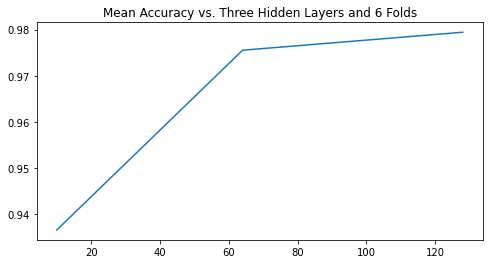

In [42]:
nn_three_neurons=[(10,10,10),
                 (64,64,64),
                 (128,128,128)]
nn_three_accuracies=[]
for n in nn_three_neurons:
    nn_three_accuracy=cross_validate(n)
    nn_mean_accuracy=np.mean(nn_three_accuracy)
    nn_three_accuracies.append(nn_mean_accuracy)
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy vs. Three Hidden Layers and 6 Folds')

x=[i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)

In [43]:
nn_three_accuracies

[0.9365533259011519, 0.975527684875511, 0.9794258639910814]

Using 3 hidden layers returned a simple accuracy of nearly 98%, even with 6-fold cross validation.